In [105]:
# Imports
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [106]:
# Load dataset
data = pd.read_csv("../data/clean_dataset.csv")

In [107]:
data.head(10)

,TV_Total,FLYERS,Print_Total,Online_Video,Online_Display,Online_Total,TikTok,YouTube_Total,YouTube_Mobile,YouTube_Desktop,...,YouTube_CTV,Pinterest,Purchase,weight,Gender,Number_of_children,Age,Age_Group,Household_Size,Total_Media_Exposure
0,0.0,0.0,0.0,10.0,4.0,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,11032.10,male,0.0,28.0,18-34,2.0,14.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,1,2581.77,female,0.0,52.0,45-54,2.0,3.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1,8219.48,male,1.0,38.0,35-44,3.0,5.0
3,0.0,0.0,0.0,11.0,2.0,13.0,0.0,1.0,1.0,0.0,...,0.0,25.0,1,6040.79,male,2.0,38.0,35-44,4.0,14.0
4,0.0,0.0,0.0,7.0,3.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,11635.16,male,0.0,28.0,18-34,2.0,10.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,13456.38,female,0.0,27.0,18-34,2.0,0.0
6,4.0,0.0,0.0,6.0,5.0,11.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1,3881.71,female,0.0,38.0,35-44,1.0,16.0
7,3.0,0.0,0.0,9.0,6.0,15.0,0.0,2.0,0.0,0.0,...,0.0,3.0,1,3993.45,female,0.0,52.0,45-54,2.0,20.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,6353.90,male,0.0,91.0,75+,1.0,1.0
9,81.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,2966.01,male,0.0,69.0,65-74,2.0,82.0


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048 entries, 0 to 16047
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV_Total              16048 non-null  float64
 1   FLYERS                16048 non-null  float64
 2   Print_Total           16048 non-null  float64
 3   Online_Video          16048 non-null  float64
 4   Online_Display        16048 non-null  float64
 5   Online_Total          16048 non-null  float64
 6   TikTok                16048 non-null  float64
 7   YouTube_Total         16048 non-null  float64
 8   YouTube_Mobile        16048 non-null  float64
 9   YouTube_Desktop       16048 non-null  float64
 10  YouTube_Tablet        16048 non-null  float64
 11  YouTube_CTV           16048 non-null  float64
 12  Pinterest             16048 non-null  float64
 13  Purchase              16048 non-null  int64  
 14  weight                16048 non-null  float64
 15  Gender             

In [109]:
# Prepare data
X = data[['Age', 'Gender', 'Number_of_children', 'Total_Media_Exposure']]
y = data['Purchase']
X = pd.get_dummies(X, drop_first=True)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64      1645
           1       0.62      0.54      0.58      1565

    accuracy                           0.61      3210
   macro avg       0.61      0.61      0.61      3210
weighted avg       0.61      0.61      0.61      3210

ROC-AUC: 0.648449265369937


## Train/Test Split

In [110]:
# Get dummies for gender
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)  # Drops one category to avoid multicollinearity

In [111]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Purchase', 'weight', 'Age_Group'])  # Drop target, weights and unwanted columns
y = data['Purchase']  # Target variable
weights = data['weight']  # Store weights separately

In [112]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y, weights, test_size=0.3, random_state=42)

## Data Scaling

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

### Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Initialize the model
lr = LogisticRegression()

# Fit the model with sample weights
lr.fit(X_train, y_train, sample_weight=w_train)

# Predict probabilities (probability of Purchase = 1)
y_pred_proba = lr.predict_proba(X_test)[:, 1]  # Probability of positive class (Purchase = 1)

# Evaluate model (using ROC AUC score)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, sample_weight=w_test))


ROC AUC Score: 0.7296661036585661


In [115]:
# # Get feature importance (absolute values of coefficients)
# feature_importance = pd.Series(np.abs(lr.coef_[0]), index=X_train.columns).sort_values(ascending=False)

# # Plot
# feature_importance[:10].plot(kind="barh")
# plt.title("Feature Importance from Logistic Regression")
# plt.show()

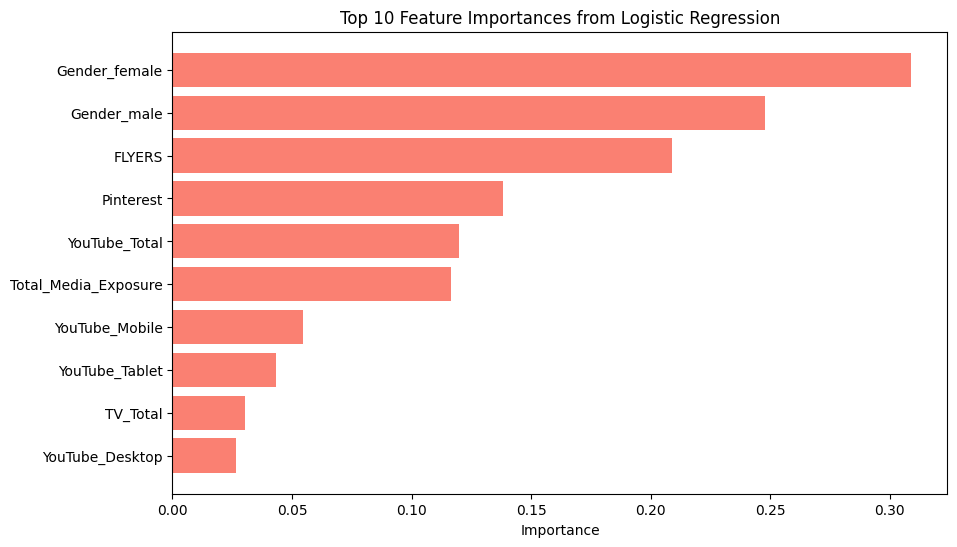

In [116]:
# Get feature importance (absolute coefficients)
feature_importance = np.abs(lr.coef_[0])

# Create a DataFrame to show features and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# print(importance_df)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='salmon')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances from Logistic Regression')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

### Random Forrest

In [128]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model with sample weights
rf.fit(X_train_scaled, y_train, sample_weight=w_train)

# Predict probabilities (probability of Purchase = 1)
# y_pred = rf.predict(X_test_scaled)
y_pred = rf.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class (Purchase = 1)

# Evaluate model (using ROC AUC score)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred, sample_weight=w_test))


ROC AUC Score: 0.6937049660385863


In [118]:
# # Get feature importance
# feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# # Plot the top features
# import matplotlib.pyplot as plt
# feature_importance[:10].plot(kind="barh")
# plt.title("Feature Importance from Random Forest")
# plt.show()

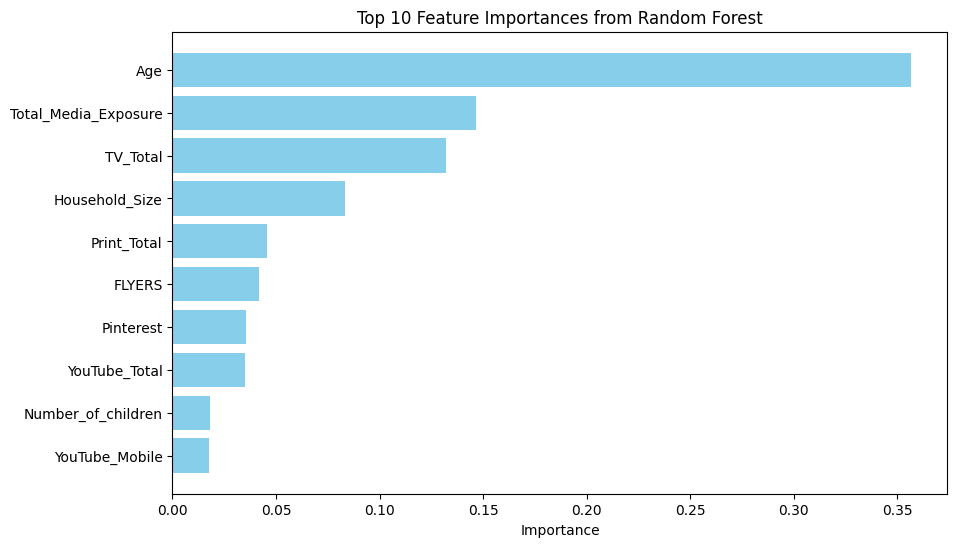

In [119]:
# Get feature importance
importance_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})

# Sort by importance
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# print(importance_df_rf)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df_rf['Feature'][:10], importance_df_rf['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

### XGBoost

In [120]:
import xgboost as xgb

# Convert to DMatrix format for XGBoost (including weights)
dtrain = xgb.DMatrix(X_train_scaled, label=y_train, weight=w_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test, weight=w_test)

# Train the model with binary logistic regression objective
params = {'objective': 'binary:logistic', 'eval_metric': 'logloss'}
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict probabilities on the test set
y_pred_proba = xgb_model.predict(dtest)

# Evaluate model (using ROC AUC score)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba, sample_weight=w_test))

ROC AUC Score: 0.7029465854787641


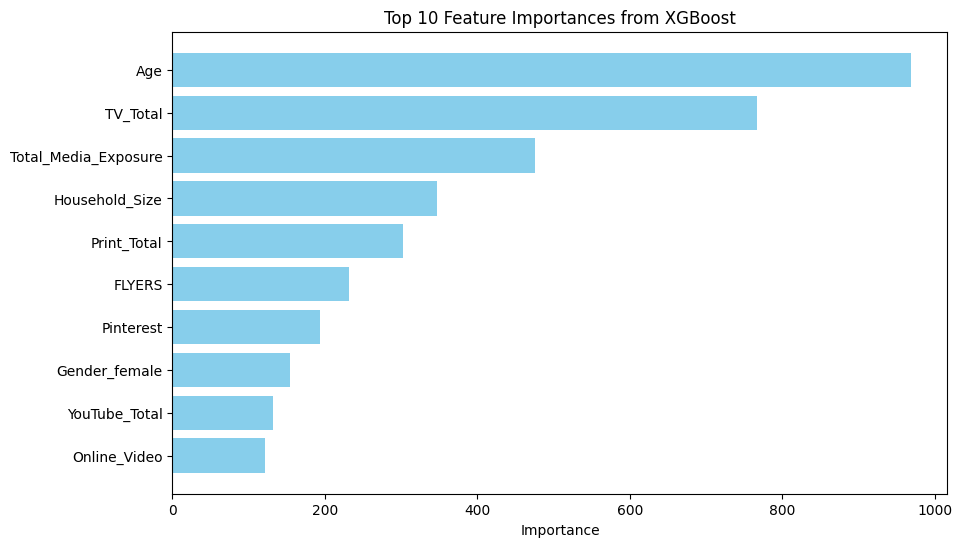

In [121]:
# Get feature importance (from XGBoost)
importance_df_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.get_score(importance_type='weight').values()  # Or use 'gain' if preferred
})

# Sort by importance
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df_xgb['Feature'][:10], importance_df_xgb['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances from XGBoost')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()